## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman3Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.1
bias = 0


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1

In [6]:
X,Y = friedman3Dataset.friedman3_data(n_samples)

          X1           X2        X3        X4         Y
0  63.329897   197.171693  0.852088  6.849662  1.113585
1  66.546755  1529.899817  0.157974  1.591196  1.297620
2  92.808268   424.763157  0.225674  2.126690  0.855180
3  94.217016   830.285657  0.198755  3.820961  1.111362
4  39.869100  1651.013019  0.677126  4.049910  1.594916


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.027471
0:	learn: 1.0127323	total: 57.6ms	remaining: 57.6s
1:	learn: 1.0020868	total: 58.4ms	remaining: 29.1s
2:	learn: 0.9912800	total: 59.5ms	remaining: 19.8s
3:	learn: 0.9820369	total: 60.3ms	remaining: 15s
4:	learn: 0.9723371	total: 61.1ms	remaining: 12.2s
5:	learn: 0.9605517	total: 62.1ms	remaining: 10.3s
6:	learn: 0.9489080	total: 63.2ms	remaining: 8.96s
7:	learn: 0.9371654	total: 64ms	remaining: 7.94s
8:	learn: 0.9244713	total: 65.4ms	remaining: 7.2s
9:	learn: 0.9152863	total: 66.2ms	remaining: 6.55s
10:	learn: 0.9074744	total: 67.2ms	remaining: 6.04s
11:	learn: 0.8965401	total: 68.3ms	remaining: 5.62s
12:	learn: 0.8860881	total: 69ms	remaining: 5.24s
13:	learn: 0.8777907	total: 69.6ms	remaining: 4.9s
14:	learn: 0.8680281	total: 70.2ms	remaining: 4.61s
15:	learn: 0.8586780	total: 70.8ms	remaining: 4.36s
16:	learn: 0.8471707	total: 71.3ms	remaining: 4.13s
17:	learn: 0.8376225	total: 71.9ms	remaining: 3.92s
18:	learn: 0.8304501	total: 72.5ms	remaining: 3.74s


38:	learn: 0.6709296	total: 82.8ms	remaining: 2.04s
39:	learn: 0.6629296	total: 83.8ms	remaining: 2.01s
40:	learn: 0.6562693	total: 84.3ms	remaining: 1.97s
41:	learn: 0.6491727	total: 85ms	remaining: 1.94s
42:	learn: 0.6421686	total: 85.7ms	remaining: 1.91s
43:	learn: 0.6356158	total: 86.3ms	remaining: 1.87s
44:	learn: 0.6293548	total: 86.9ms	remaining: 1.84s
45:	learn: 0.6232946	total: 87.5ms	remaining: 1.81s
46:	learn: 0.6181220	total: 88.1ms	remaining: 1.79s
47:	learn: 0.6132560	total: 88.8ms	remaining: 1.76s
48:	learn: 0.6075379	total: 89.4ms	remaining: 1.74s
49:	learn: 0.6027129	total: 90.1ms	remaining: 1.71s
50:	learn: 0.5966748	total: 90.7ms	remaining: 1.69s
51:	learn: 0.5898506	total: 91.3ms	remaining: 1.66s
52:	learn: 0.5850370	total: 92ms	remaining: 1.64s
53:	learn: 0.5791540	total: 92.5ms	remaining: 1.62s
54:	learn: 0.5749819	total: 92.9ms	remaining: 1.59s
55:	learn: 0.5695206	total: 93.4ms	remaining: 1.57s
56:	learn: 0.5634978	total: 93.9ms	remaining: 1.55s
57:	learn: 0.557

216:	learn: 0.1978951	total: 165ms	remaining: 596ms
217:	learn: 0.1968373	total: 166ms	remaining: 594ms
218:	learn: 0.1959254	total: 166ms	remaining: 593ms
219:	learn: 0.1952928	total: 167ms	remaining: 591ms
220:	learn: 0.1942137	total: 167ms	remaining: 589ms
221:	learn: 0.1934771	total: 168ms	remaining: 587ms
222:	learn: 0.1925162	total: 168ms	remaining: 586ms
223:	learn: 0.1917178	total: 169ms	remaining: 584ms
224:	learn: 0.1910709	total: 169ms	remaining: 582ms
225:	learn: 0.1903190	total: 170ms	remaining: 581ms
226:	learn: 0.1895791	total: 170ms	remaining: 579ms
227:	learn: 0.1886641	total: 170ms	remaining: 577ms
228:	learn: 0.1878383	total: 171ms	remaining: 575ms
229:	learn: 0.1871085	total: 171ms	remaining: 573ms
230:	learn: 0.1864192	total: 172ms	remaining: 571ms
231:	learn: 0.1851607	total: 172ms	remaining: 569ms
232:	learn: 0.1845616	total: 172ms	remaining: 567ms
233:	learn: 0.1835396	total: 173ms	remaining: 565ms
234:	learn: 0.1829833	total: 173ms	remaining: 564ms
235:	learn: 

377:	learn: 0.1143076	total: 232ms	remaining: 382ms
378:	learn: 0.1140717	total: 233ms	remaining: 382ms
379:	learn: 0.1137849	total: 233ms	remaining: 381ms
380:	learn: 0.1134912	total: 234ms	remaining: 380ms
381:	learn: 0.1131947	total: 234ms	remaining: 379ms
382:	learn: 0.1129761	total: 235ms	remaining: 378ms
383:	learn: 0.1126926	total: 235ms	remaining: 377ms
384:	learn: 0.1124141	total: 236ms	remaining: 376ms
385:	learn: 0.1121328	total: 236ms	remaining: 375ms
386:	learn: 0.1114777	total: 236ms	remaining: 374ms
387:	learn: 0.1112475	total: 237ms	remaining: 373ms
388:	learn: 0.1106314	total: 237ms	remaining: 372ms
389:	learn: 0.1101379	total: 237ms	remaining: 371ms
390:	learn: 0.1098650	total: 238ms	remaining: 371ms
391:	learn: 0.1096431	total: 238ms	remaining: 370ms
392:	learn: 0.1091659	total: 239ms	remaining: 369ms
393:	learn: 0.1088985	total: 239ms	remaining: 368ms
394:	learn: 0.1086361	total: 239ms	remaining: 367ms
395:	learn: 0.1084941	total: 240ms	remaining: 366ms
396:	learn: 

581:	learn: 0.0573167	total: 317ms	remaining: 228ms
582:	learn: 0.0571513	total: 318ms	remaining: 227ms
583:	learn: 0.0568755	total: 318ms	remaining: 227ms
584:	learn: 0.0566062	total: 319ms	remaining: 226ms
585:	learn: 0.0563432	total: 319ms	remaining: 225ms
586:	learn: 0.0561850	total: 320ms	remaining: 225ms
587:	learn: 0.0559293	total: 320ms	remaining: 224ms
588:	learn: 0.0558537	total: 320ms	remaining: 224ms
589:	learn: 0.0557799	total: 321ms	remaining: 223ms
590:	learn: 0.0556077	total: 321ms	remaining: 222ms
591:	learn: 0.0553584	total: 322ms	remaining: 222ms
592:	learn: 0.0551150	total: 322ms	remaining: 221ms
593:	learn: 0.0550442	total: 322ms	remaining: 220ms
594:	learn: 0.0547035	total: 323ms	remaining: 220ms
595:	learn: 0.0543699	total: 323ms	remaining: 219ms
596:	learn: 0.0542283	total: 324ms	remaining: 218ms
597:	learn: 0.0540658	total: 324ms	remaining: 218ms
598:	learn: 0.0537391	total: 324ms	remaining: 217ms
599:	learn: 0.0534191	total: 325ms	remaining: 217ms
600:	learn: 

766:	learn: 0.0346657	total: 394ms	remaining: 120ms
767:	learn: 0.0345162	total: 395ms	remaining: 119ms
768:	learn: 0.0344180	total: 395ms	remaining: 119ms
769:	learn: 0.0343099	total: 396ms	remaining: 118ms
770:	learn: 0.0342142	total: 397ms	remaining: 118ms
771:	learn: 0.0341185	total: 397ms	remaining: 117ms
772:	learn: 0.0339718	total: 397ms	remaining: 117ms
773:	learn: 0.0338273	total: 398ms	remaining: 116ms
774:	learn: 0.0337348	total: 398ms	remaining: 116ms
775:	learn: 0.0336723	total: 399ms	remaining: 115ms
776:	learn: 0.0335807	total: 399ms	remaining: 115ms
777:	learn: 0.0335431	total: 399ms	remaining: 114ms
778:	learn: 0.0334091	total: 400ms	remaining: 113ms
779:	learn: 0.0333935	total: 401ms	remaining: 113ms
780:	learn: 0.0332047	total: 401ms	remaining: 112ms
781:	learn: 0.0331677	total: 401ms	remaining: 112ms
782:	learn: 0.0331229	total: 402ms	remaining: 111ms
783:	learn: 0.0331077	total: 402ms	remaining: 111ms
784:	learn: 0.0330929	total: 402ms	remaining: 110ms
785:	learn: 

970:	learn: 0.0179357	total: 480ms	remaining: 14.3ms
971:	learn: 0.0178598	total: 480ms	remaining: 13.8ms
972:	learn: 0.0178056	total: 481ms	remaining: 13.3ms
973:	learn: 0.0177354	total: 481ms	remaining: 12.8ms
974:	learn: 0.0176614	total: 482ms	remaining: 12.3ms
975:	learn: 0.0176087	total: 482ms	remaining: 11.9ms
976:	learn: 0.0175216	total: 483ms	remaining: 11.4ms
977:	learn: 0.0174462	total: 483ms	remaining: 10.9ms
978:	learn: 0.0174038	total: 483ms	remaining: 10.4ms
979:	learn: 0.0173325	total: 484ms	remaining: 9.87ms
980:	learn: 0.0172879	total: 484ms	remaining: 9.37ms
981:	learn: 0.0172038	total: 485ms	remaining: 8.88ms
982:	learn: 0.0171602	total: 485ms	remaining: 8.39ms
983:	learn: 0.0170777	total: 485ms	remaining: 7.89ms
984:	learn: 0.0170369	total: 486ms	remaining: 7.4ms
985:	learn: 0.0169697	total: 486ms	remaining: 6.9ms
986:	learn: 0.0169045	total: 487ms	remaining: 6.41ms
987:	learn: 0.0168412	total: 487ms	remaining: 5.91ms
988:	learn: 0.0168303	total: 487ms	remaining: 5.

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MAE",mae)
print("Prior Model MAE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MAE",mae)
print("ABC Pre-generator MAE",mae)

Prior Model MAE 0.3130886771597874


ABC Pre-generator MAE 0.3248676293351675


# mGAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

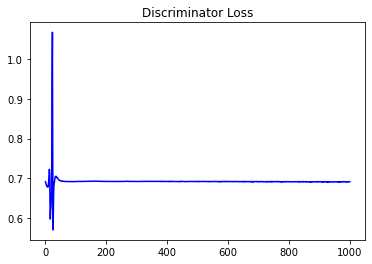

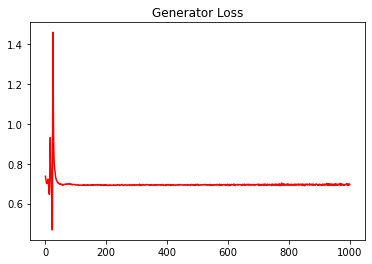

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MAE")
print(mean(ABC_GAN1_metrics[1]))

MAE
0.31808672508317976


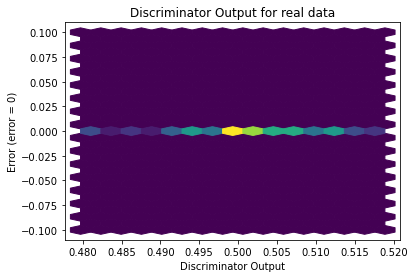

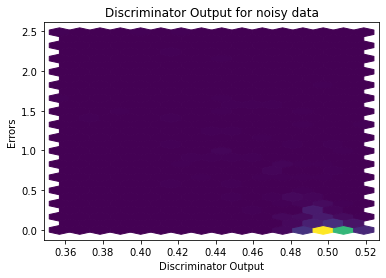

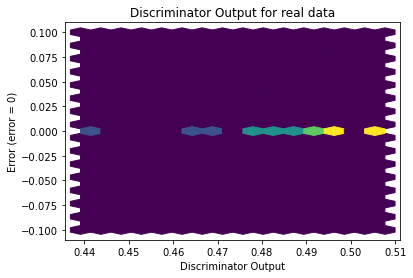

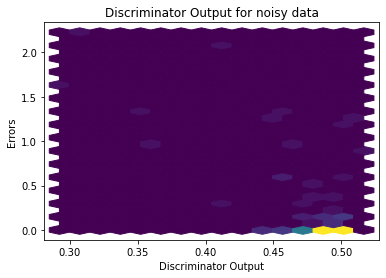

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# mGAN Model with TabNet Generator

In [15]:
gen2 = network.GeneratorTabnet(n_features+1).to(device)
disc2 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen2.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc2.parameters(), lr=0.001, betas=(0.5, 0.999))

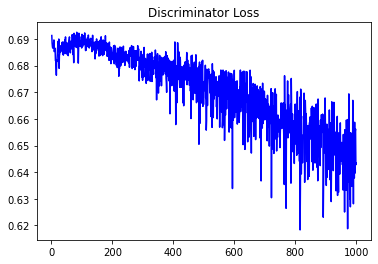

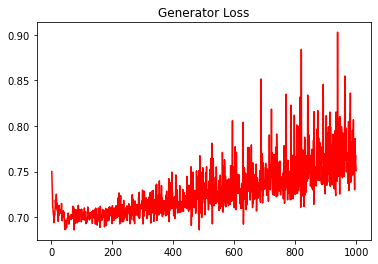

In [16]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc2,gen2,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN2_metrics=ABC_train_test2.test_generator(gen2,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_2 Metrics",ABC_GAN2_metrics)

print("MAE")
print(mean(ABC_GAN2_metrics[1]))

MAE
0.4396679259329103


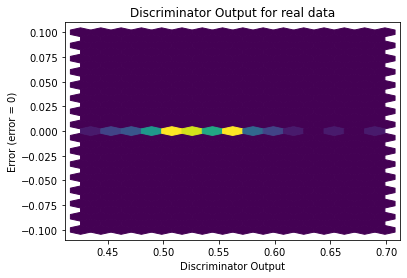

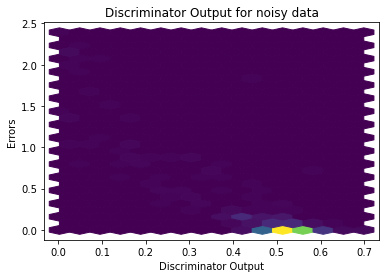

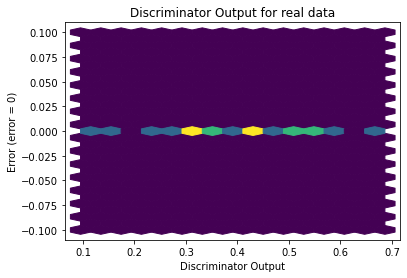

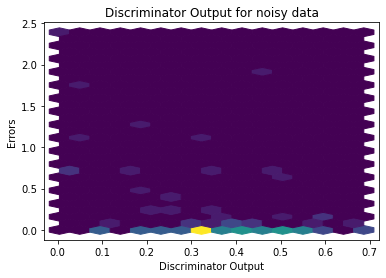

In [18]:
sanityChecks.discProbVsError(train_data,disc2,device)
sanityChecks.discProbVsError(test_data,disc2,device)

# skipGAN Model

In [19]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


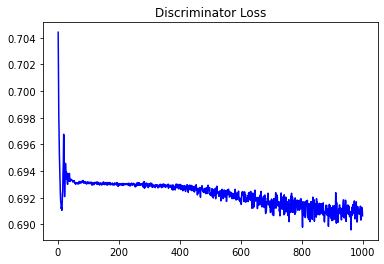

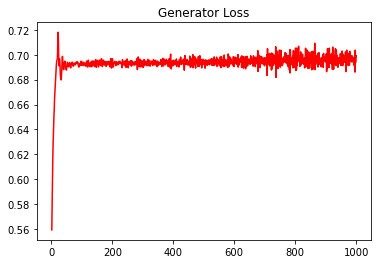

In [20]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [21]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MAE")
print(mean(ABC_GAN3_metrics[1]))

MAE
0.326535210180562


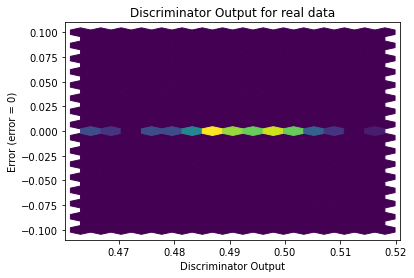

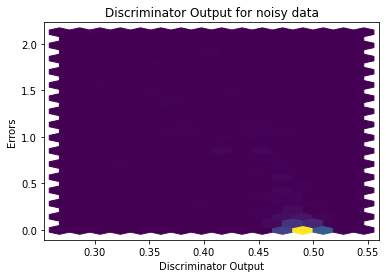

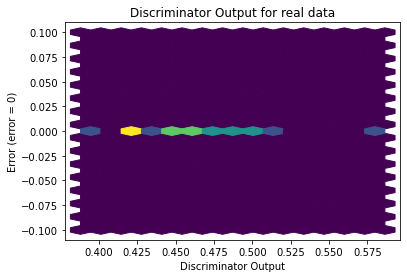

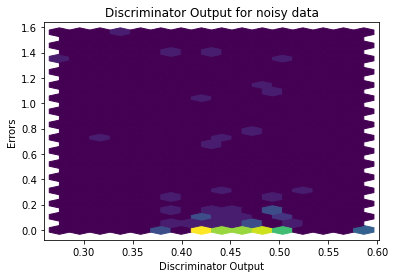

In [22]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

# skipGAN Model with TabNet Generator

In [23]:
#Generator
gen4 = network.GeneratorTabnetskipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc4 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen4.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc4.parameters(), lr=0.001, betas=(0.5, 0.999))


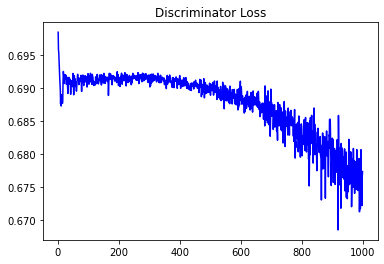

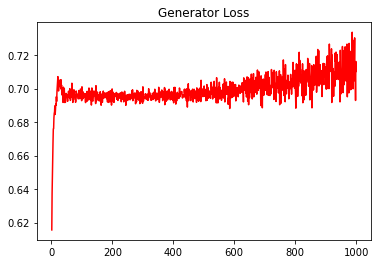

In [24]:
ABC_train_test2.training_GAN_skip_connection(disc4,gen4,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [25]:
ABC_GAN4_metrics=ABC_train_test2.test_generator(gen4,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_4 Metrics",ABC_GAN4_metrics)

print("MAE")
print(mean(ABC_GAN4_metrics[1]))

MAE
0.319527582795592


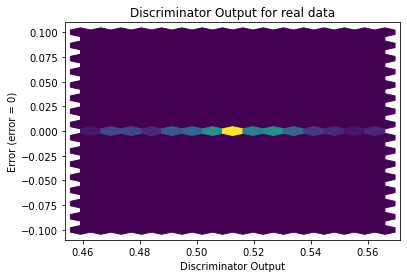

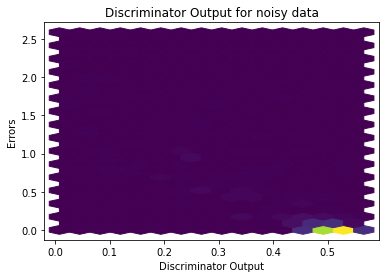

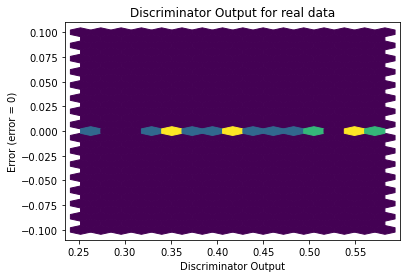

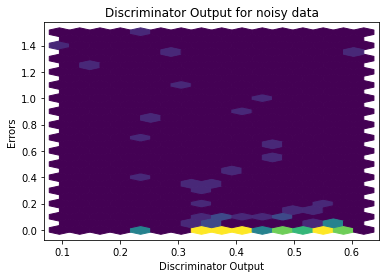

In [26]:
sanityChecks.discProbVsError(train_data,disc4,device)
sanityChecks.discProbVsError(test_data,disc4,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [27]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.4264]], requires_grad=True)


## skipGAN Model Analysis (TabNet Generator) 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [28]:
print("Weight of the node at skip connection")
for name,param in gen4.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.0579]], requires_grad=True)
